In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 10:18:17.624445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_II dataset

In [4]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
1
(20000, 2048)
(20000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
2
(30000, 2048)
(30000,)
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.009

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-26 14:45:39.006109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 12.5374 - accuracy: 0.0612
test loss, test acc: [12.53742504119873, 0.061239998787641525]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[   6    0    0    0    0    0    0    0    0 9994]
 [   1    1    0    0    0    6    0    0 9992    0]
 [   1    1    0 1208    0 8535    2    0  253    0]
 [   0    0    0    0    0    0    0 1286 8714    0]
 [1244    0    0    0    0    0 8756    0    0    0]
 [   1   23    0    0    6 5905    1    0 4064    0]
 [   2 4283  328   31    3 5250    0    0  103    0]
 [  27    1    0    0    0    2    0  208 9762    0]
 [   4 9306   60    0    1    4  621    0    4    0]
 [   4 1733 3872    0    0    1 4390    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.30      0.59      0.40     10000
           6       0.00      0.0

Test Accuracy:0.06124


Text(0.5, 1.0, 'Accuracy:0.061')

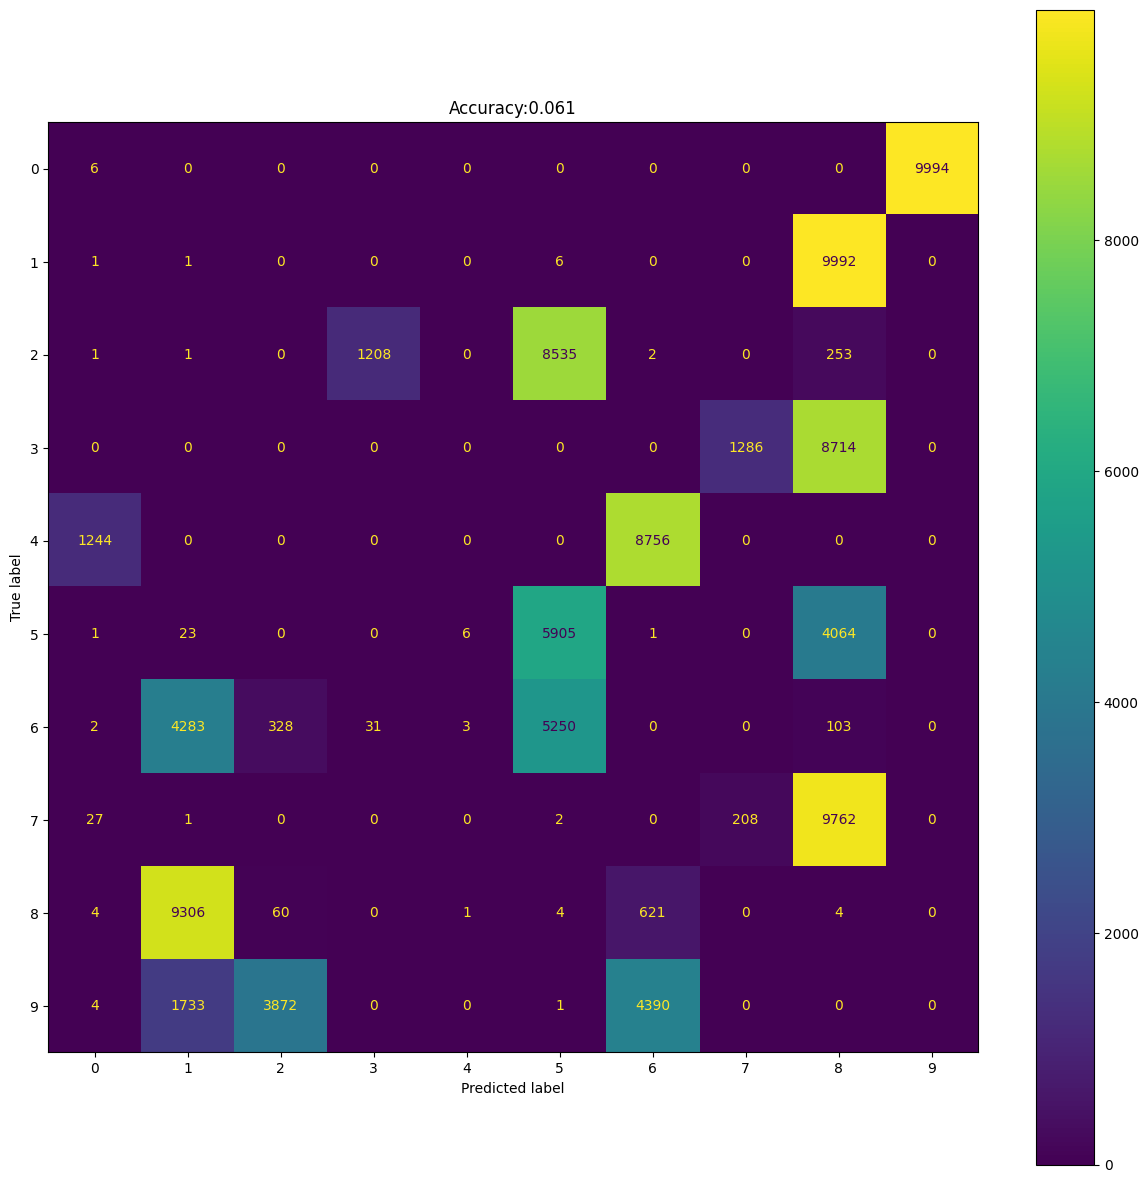

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.4449 - accuracy: 0.6588
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3533 - accuracy: 0.9208
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2939 - accuracy: 0.9336
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2662 - accuracy: 0.9377
Epoch 5/30
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2489 - accuracy: 0.9413
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2370 - accuracy: 0.9431
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2280 - accuracy: 0.9444
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2209 - accuracy: 0.9462
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2151 - accuracy: 0.9469
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

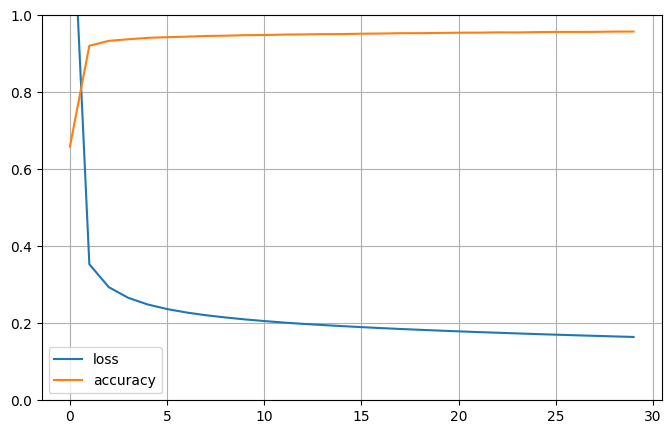

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.1644 - accuracy: 0.9572
test loss, test acc: [0.16442638635635376, 0.9571999907493591]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[9995    0    0    0    5    0    0    0    0    0]
 [   0 9616    1  169    0  121    0   91    1    1]
 [   1    1 9812    1    1  140   43    0    1    0]
 [   0  146    0 9210    0    1    0  643    0    0]
 [   0    0    0    0 9982    0    0    0    4   14]
 [   0   83  159    8    2 9575  168    3    2    0]
 [   2    4   34    0    2  376 9562    0   12    8]
 [   0   64    3  645   26    1    0 9259    1    1]
 [   1    1    0    0    4    0   18    0 9151  825]
 [   1    0    0    0    6    0   30    0  405 9558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.97      0.96      0.97     10000
           2       0.98      0.98      0.98     10000
           3       0.92      0.92      0.92     10000
           4       1.00      1.00      1.00     10000
           5       0.94      0.96      0.95     10000
           6       0.97      0.9

Test Accuracy:0.9572


Text(0.5, 1.0, 'Accuracy:0.957')

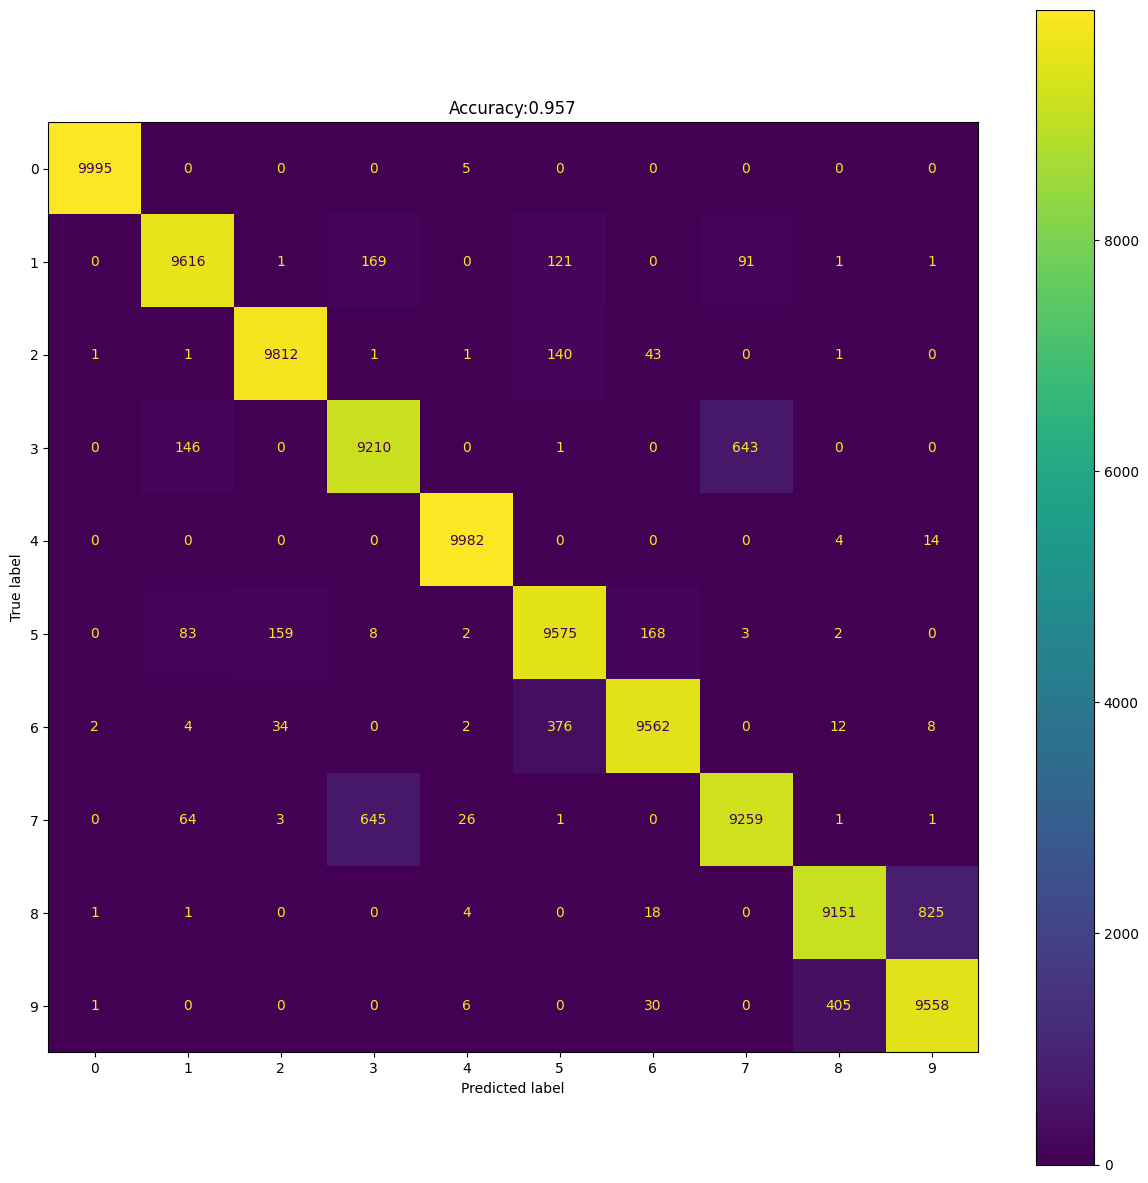

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 8.5562 - accuracy: 0.1818
test loss, test acc: [8.556156158447266, 0.18176999688148499]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[   8    0    0    6    0    7   20    6 9951    2]
 [   3   33  552    1   24    0    0 9380    7    0]
 [   1    1    0    0   11 8202 1310  387   86    2]
 [ 877    5 8920    0    0    0    0  106   92    0]
 [   0 1695    0 7470   43    0    0    0    0  792]
 [   0 2953   62    0 3749 2109  257  851    0   19]
 [   0   32    0    0  184 3814   14    0    0 5956]
 [   9    1    0    0    0    0    0 6251 3723   16]
 [   0 6379    0 1025 2083    0    0    0    0  513]
 [   0    1    0    1  227   41    1   10    0 9719]]
              precision    recall  f1-score   support

           0       0.01      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.01      0.00      0.01     10000
           5       0.15      0.21      0.17     10000
           6       0.01      0.0

Test Accuracy:0.18177


Text(0.5, 1.0, 'Accuracy:0.182')

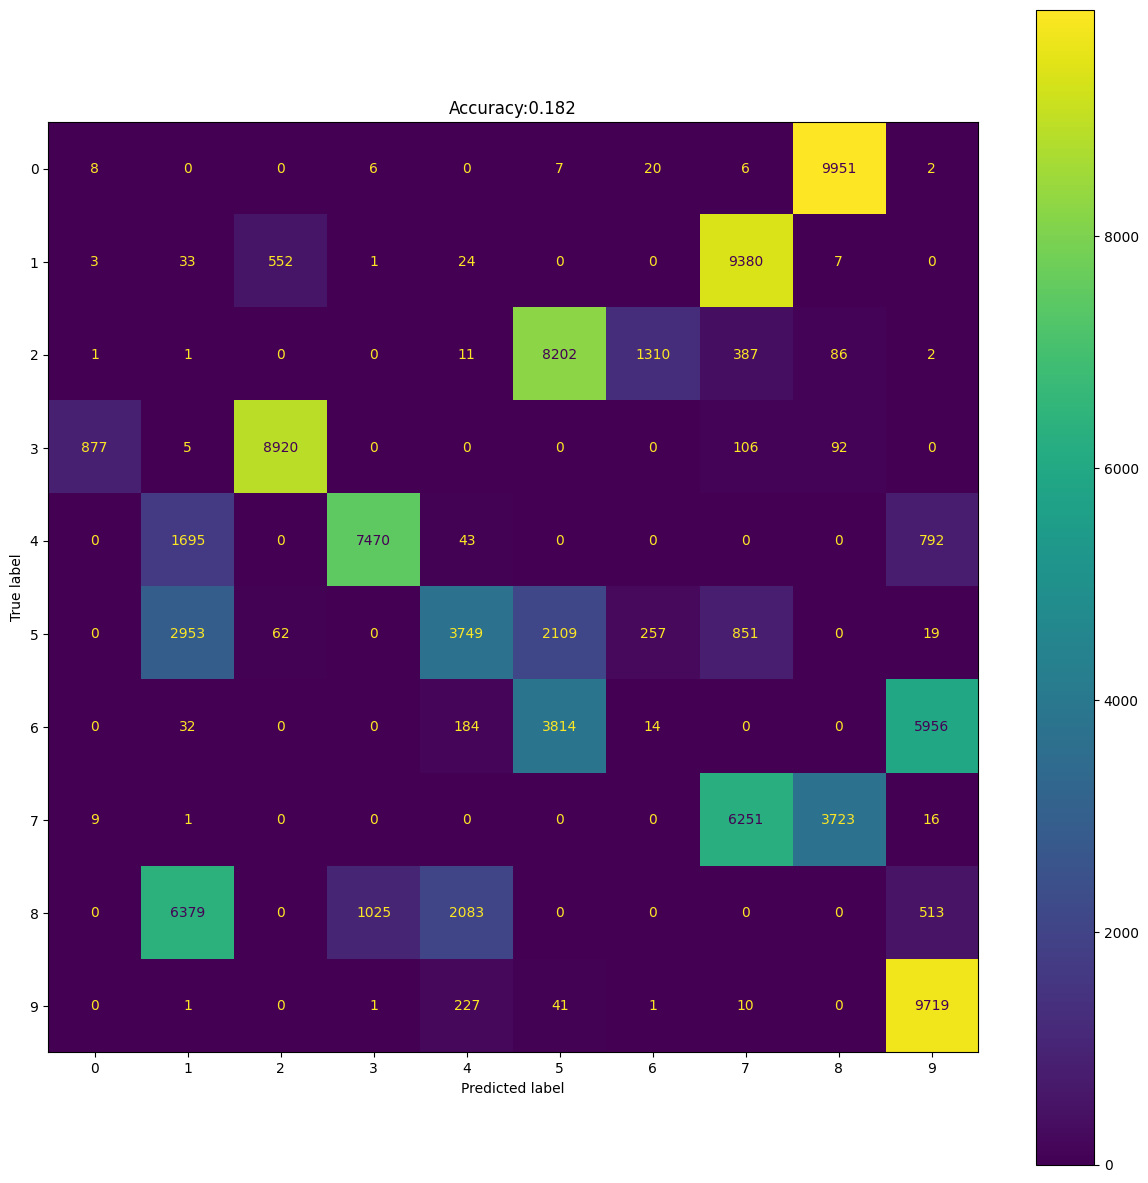

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 1.2053 - accuracy: 0.6890
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4167 - accuracy: 0.9178
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3054 - accuracy: 0.9546
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2511 - accuracy: 0.9661
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2176 - accuracy: 0.9718
Epoch 6/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.1942 - accuracy: 0.9747
Epoch 7/30
3125/3125 [==============================] - 20s 7ms/step - loss: 0.1768 - accuracy: 0.9772
Epoch 8/30
3125/3125 [==============================] - 33s 11ms/step - loss: 0.1634 - accuracy: 0.9782
Epoch 9/30
3125/3125 [==============================] - 24s 8ms/step - loss: 0.1527 - accuracy: 0.9795
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - 

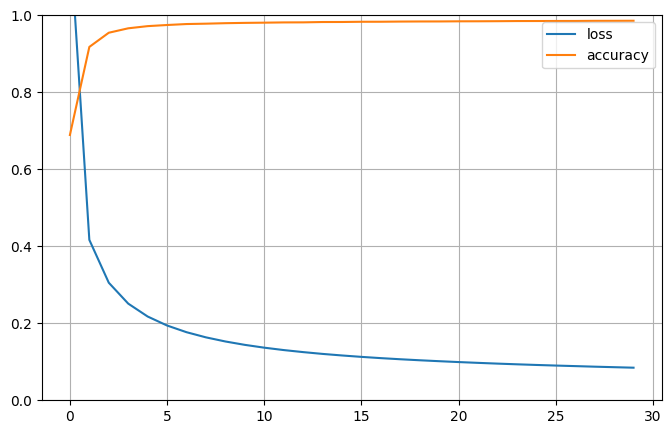

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.0839 - accuracy: 0.9858
test loss, test acc: [0.08394534140825272, 0.98580002784729]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[9962    1   29    1    6    0    0    0    0    1]
 [   0 9763    0  149    0   35    0   52    1    0]
 [   0    2 9834    1    0  135   24    1    0    3]
 [   0  168    0 9828    0    0    0    3    1    0]
 [   0    0    0    0 9974    0    0    0   17    9]
 [   0   49  187    7    0 9668   81    0    7    1]
 [   0    0   19    0    0  115 9798    0   11   57]
 [  20   10    3    1   14    0    0 9939    1   12]
 [   0    4    0    1   42    0    0    0 9898   55]
 [   0    1    0    0    0   10   45    0   28 9916]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.98      0.98      0.98     10000
           2       0.98      0.98      0.98     10000
           3       0.98      0.98      0.98     10000
           4       0.99      1.00      1.00     10000
           5       0.97      0.97      0.97     10000
           6       0.98      0.9

Test Accuracy:0.9858


Text(0.5, 1.0, 'Accuracy:0.986')

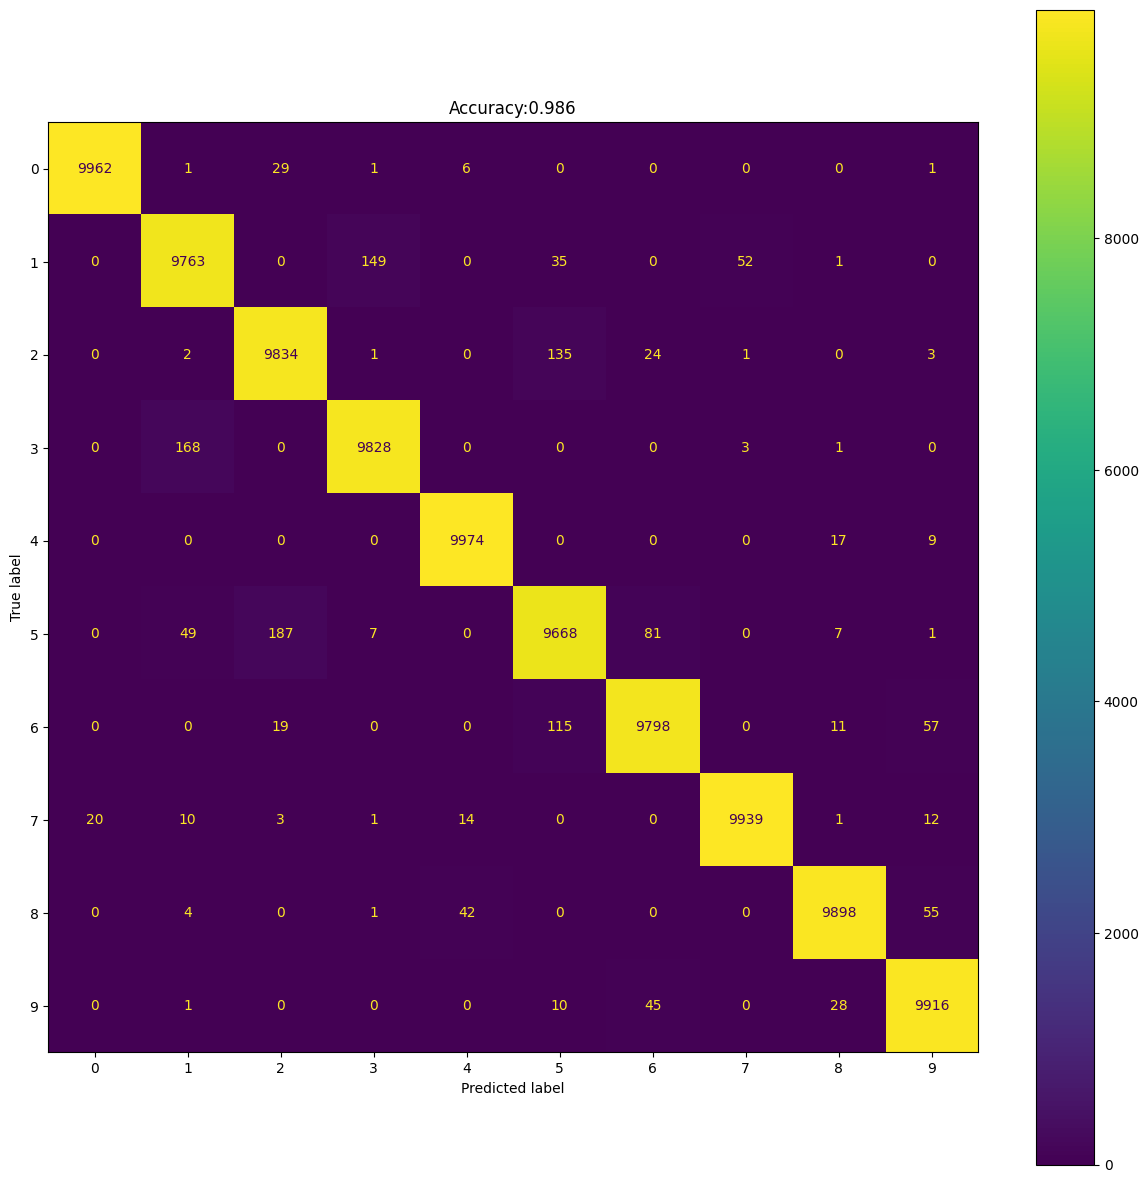

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 11.7347 - accuracy: 0.0291
test loss, test acc: [11.734724044799805, 0.02913999930024147]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0    0    0    5    0    0    0    0 9995    0]
 [ 845 2802 1988 3887    0    2  476    0    0    0]
 [3895    1    0    3    0 5509   25  567    0    0]
 [ 434 8392  679   78   30   27  360    0    0    0]
 [   0    0  451 9549    0    0    0    0    0    0]
 [2910 1829  513 3554    0   31 1162    1    0    0]
 [2451    1    1 6065    0    0    3 1477    0    2]
 [ 285 2243   14   28  117  532 6781    0    0    0]
 [   2    0  281 9717    0    0    0    0    0    0]
 [   3    0  763 9234    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.18      0.28      0.22     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.01      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.01      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.02914


Text(0.5, 1.0, 'Accuracy:0.029')

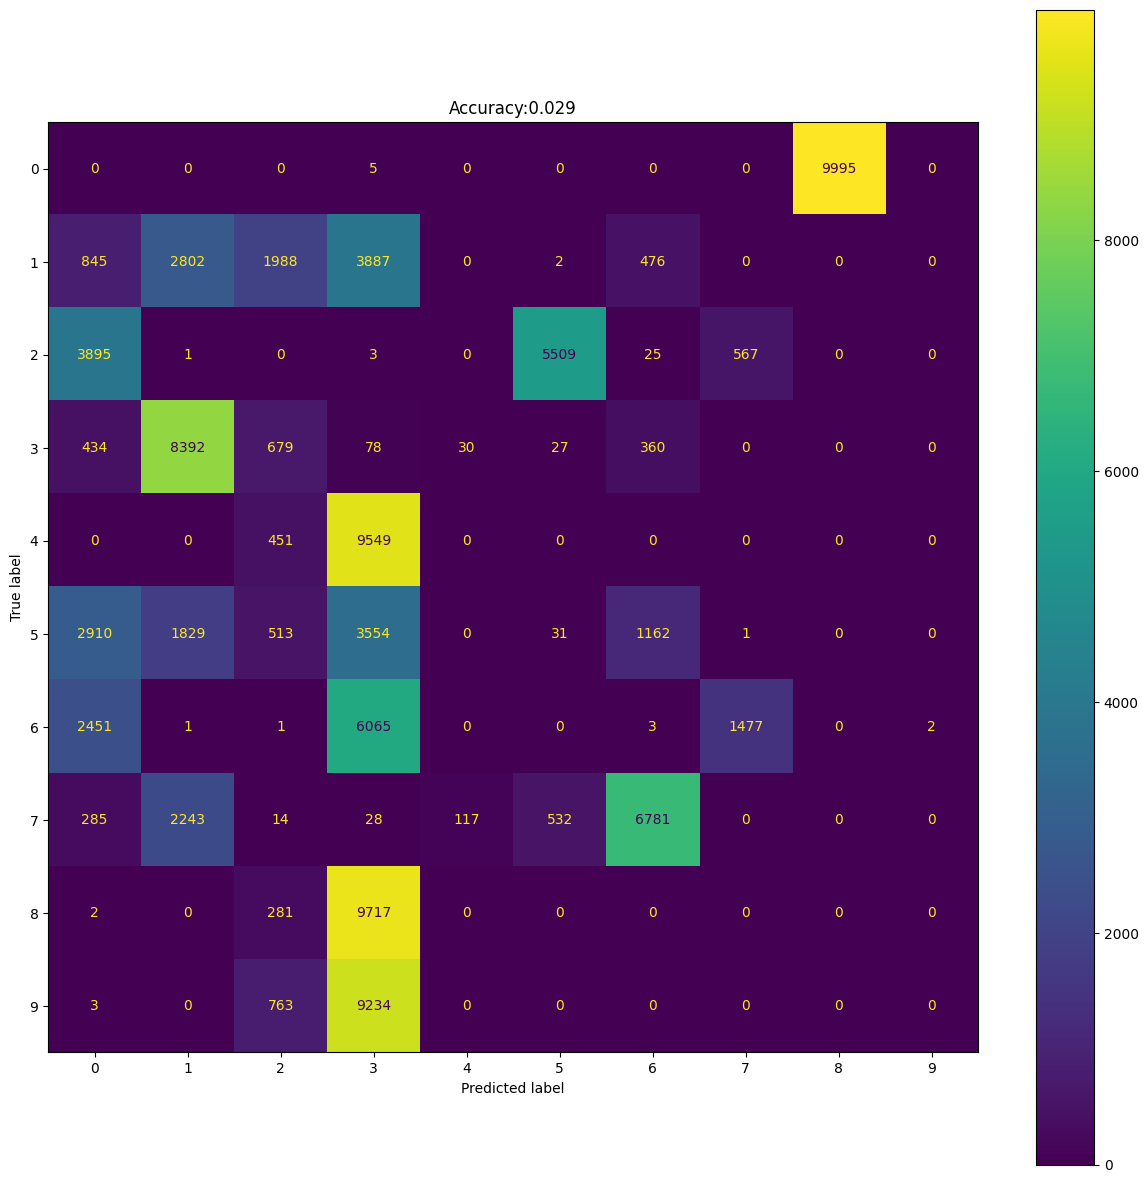

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [29]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 1.9586 - accuracy: 0.4812
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6711 - accuracy: 0.7912
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5642 - accuracy: 0.8235
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5142 - accuracy: 0.8356
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4840 - accuracy: 0.8425
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4630 - accuracy: 0.8473
Epoch 7/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4473 - accuracy: 0.8517
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4353 - accuracy: 0.8549
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4253 - accuracy: 0.8578
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

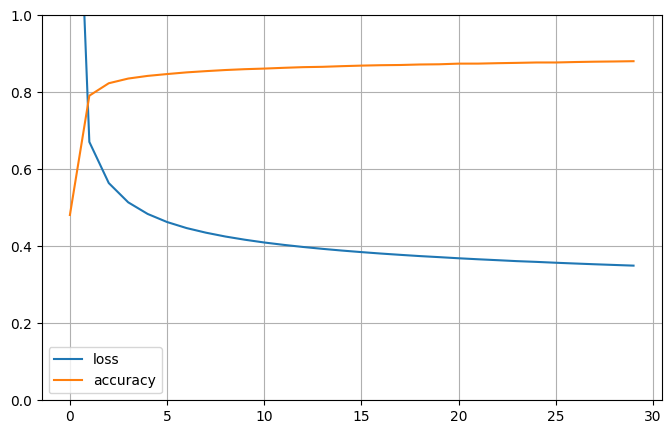

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3495 - accuracy: 0.8813
test loss, test acc: [0.3494633138179779, 0.8813400268554688]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9995    0    0    0    5    0    0    0    0    0]
 [   0 6716    2  909    0 2112   35   71  124   31]
 [   2    1 9889    0    0   15   50   42    0    1]
 [   0  993   10 7748    0  535    0  714    0    0]
 [   0    0    0    0 9722    0    1    0  179   98]
 [   0 1164   25  472    2 7897  144  232   34   30]
 [   0    1   29    0    2  191 9721    0   39   17]
 [   0   59   54  534   26  210    0 9116    0    1]
 [   0   45    0    0  256   57   70    0 8468 1104]
 [   0    7    0    0  149   27   26    0  929 8862]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.75      0.67      0.71     10000
           2       0.99      0.99      0.99     10000
           3       0.80      0.77      0.79     10000
           4       0.96      0.97      0.96     10000
           5       0.72      0.79      0.75     10000
           6       0.97      0.9

Test Accuracy:0.88134


Text(0.5, 1.0, 'Accuracy:0.881')

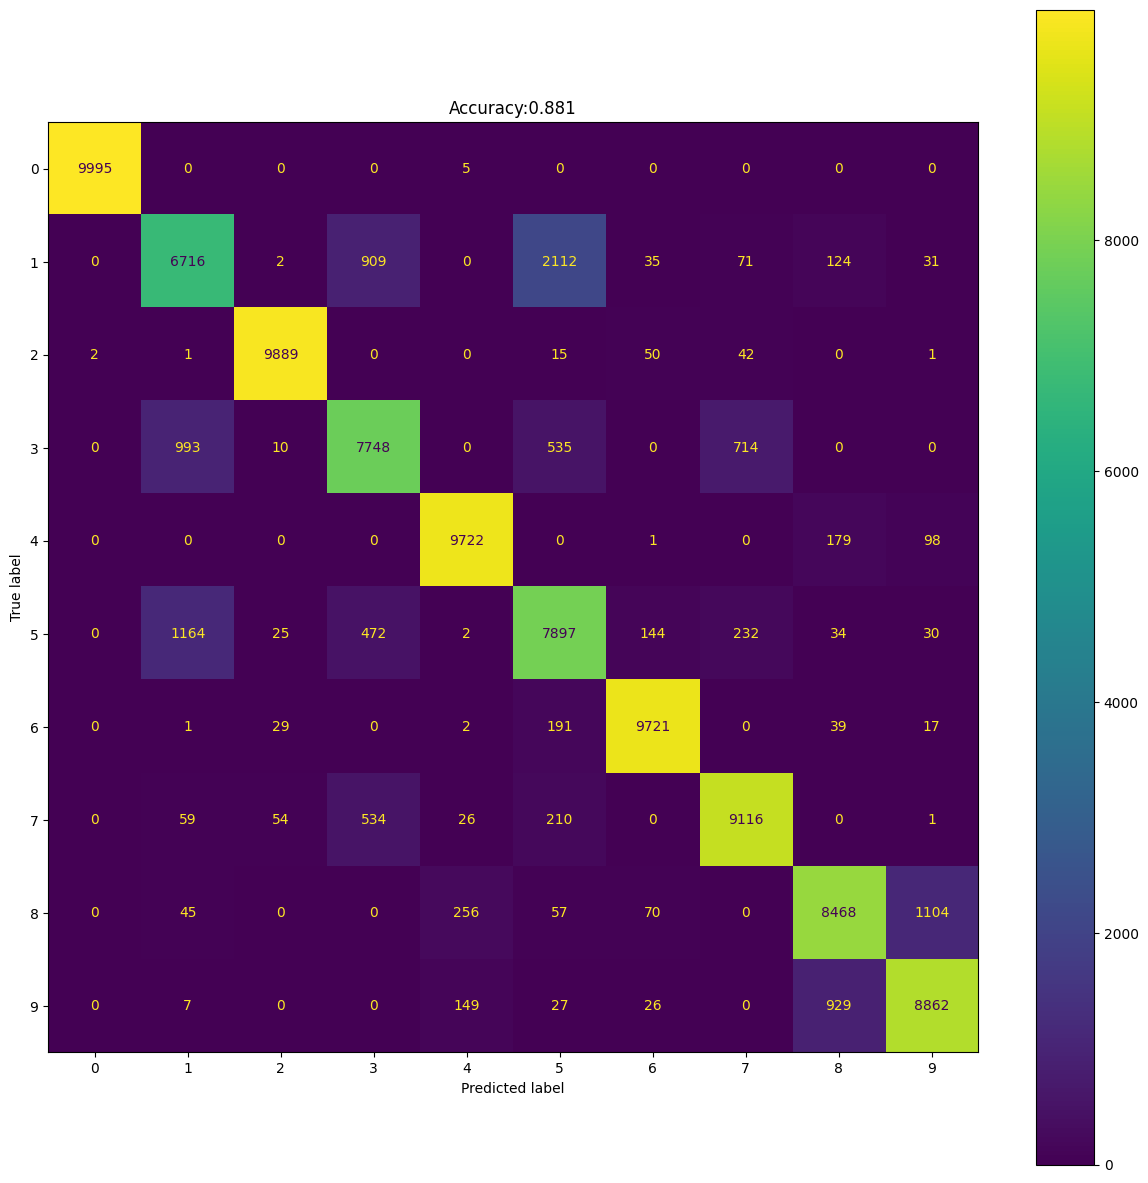

In [33]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh model

Cross-model Validation without training

In [34]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [35]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 16.9111 - accuracy: 0.1997
test loss, test acc: [16.911073684692383, 0.19968000054359436]


In [36]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[9995    0    0    0    0    1    0    0    4    0]
 [   1    2   22    0    1    0    0 9715    1  258]
 [   0    0 9937    0    0    2    1   45    0   15]
 [   1    0 5163    0    1    0    0 4835    0    0]
 [   0    0    0    0    0   88  675    0 9237    0]
 [   1    0  938    0    1    0    1 8980    0   79]
 [   0    2   92    0    1    1    1  180    1 9722]
 [   0   26 9940    0    0    1    0   32    1    0]
 [   0 9921    0    0   70    4    5    0    0    0]
 [   0 9496    0    0    0    1  500    0    2    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.00      0.00      0.00     10000
           2       0.38      0.99      0.55     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.19968


Text(0.5, 1.0, 'Accuracy:0.200')

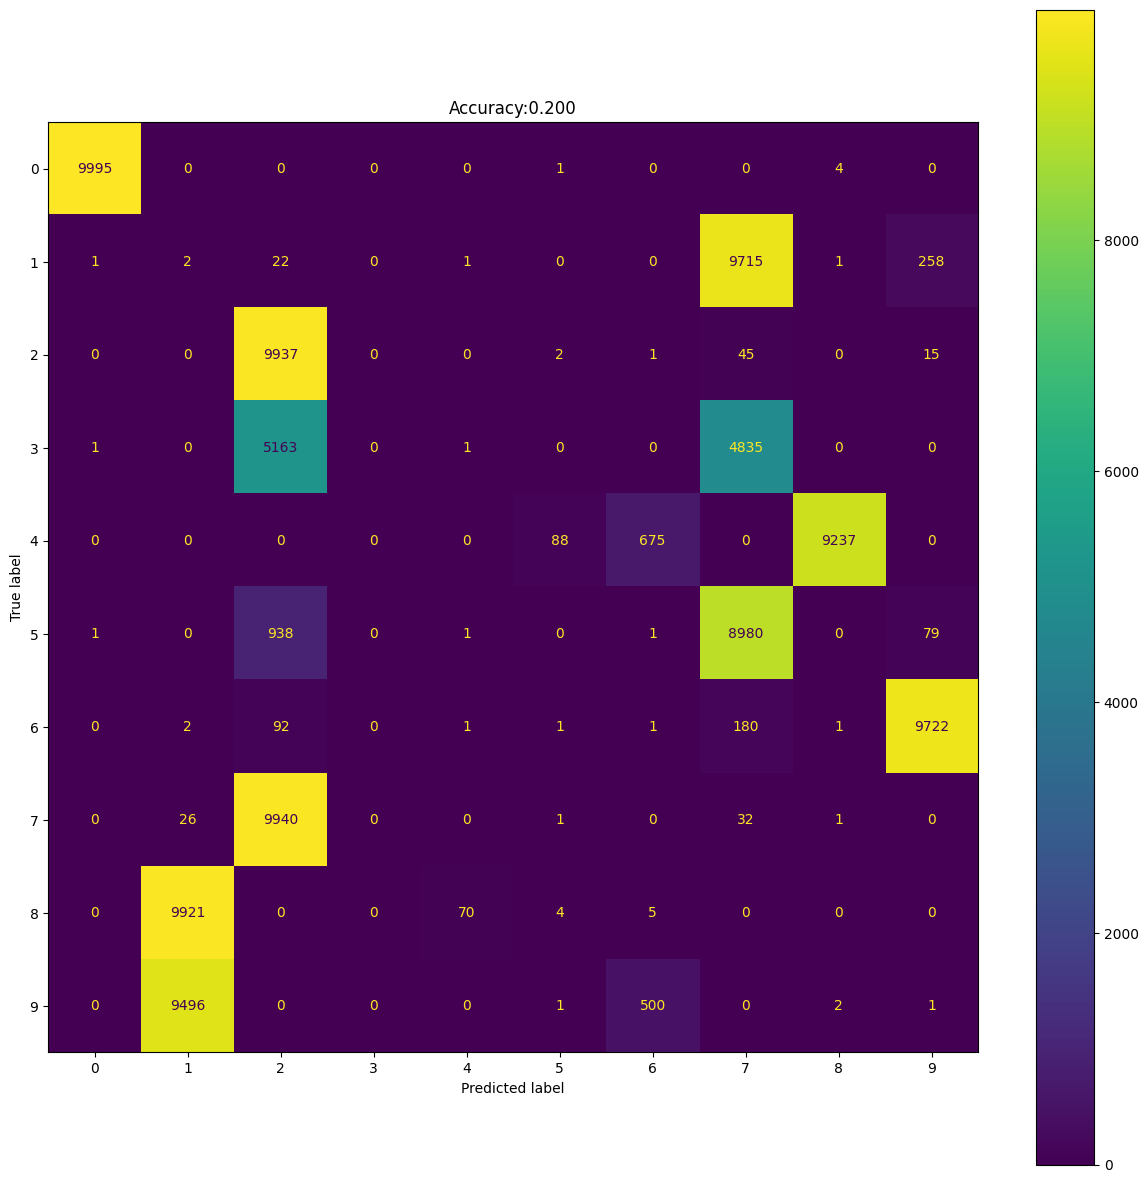

In [37]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [38]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [40]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.1353 - accuracy: 0.9756
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.1328 - accuracy: 0.9758
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.1302 - accuracy: 0.9760
Epoch 4/30
3125/3125 [==============================] - 19s 6ms/step - loss: 0.1279 - accuracy: 0.9761
Epoch 5/30
3125/3125 [==============================] - 21s 7ms/step - loss: 0.1256 - accuracy: 0.9766
Epoch 6/30
3125/3125 [==============================] - 17s 6ms/step - loss: 0.1233 - accuracy: 0.9763
Epoch 7/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.1214 - accuracy: 0.9769
Epoch 8/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.1197 - accuracy: 0.9768
Epoch 9/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.1182 - accuracy: 0.9773
Epoch 10/30
3125/3125 [==============================] - 17s 5ms/step - l

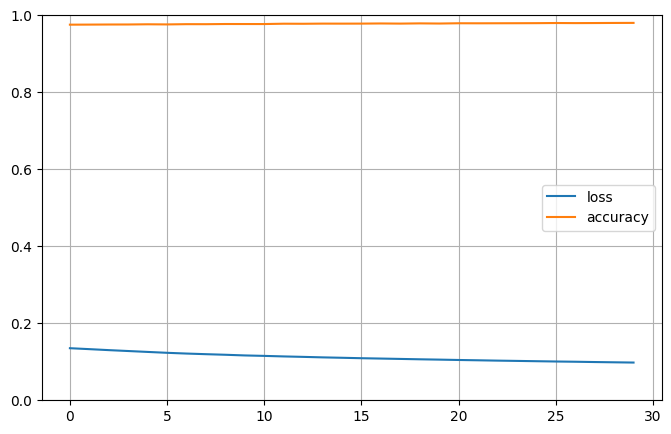

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.0966 - accuracy: 0.9808
test loss, test acc: [0.09657628834247589, 0.9807500243186951]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9995    0    0    0    5    0    0    0    0    0]
 [   0 9669    1    6    1  295   20    5    2    1]
 [   1    3 9711    5    1  147   14  117    0    1]
 [   0   32    0 9826    0    4    0  136    2    0]
 [   2    0    0    0 9998    0    0    0    0    0]
 [   0  462   75   47    0 9295  113    6    1    1]
 [   0   19   20    1    1   92 9865    1    0    1]
 [   5    9   55   68    2   12    0 9848    0    1]
 [   2    0    0    0    2    0    0    0 9929   67]
 [   1    0    0    0    4    0    0    0   56 9939]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.95      0.97      0.96     10000
           2       0.98      0.97      0.98     10000
           3       0.99      0.98      0.98     10000
           4       1.00      1.00      1.00     10000
           5       0.94      0.93      0.94     10000
           6       0.99      0.9

Test Accuracy:0.98075


Text(0.5, 1.0, 'Accuracy:0.981')

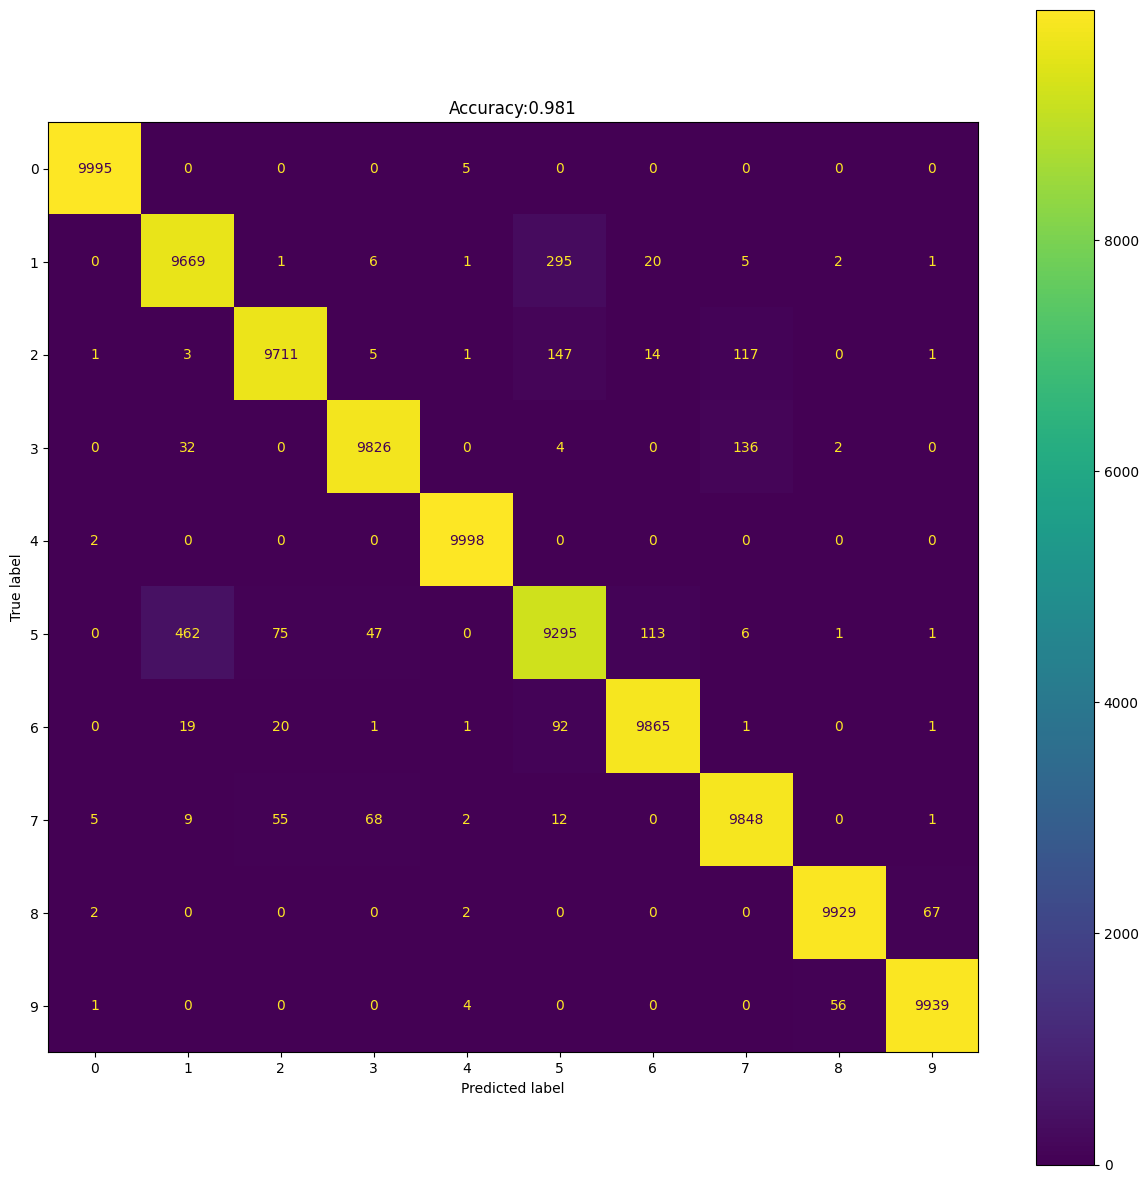

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [5]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

2023-02-27 10:25:18.585093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [6]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 12.5384 - accuracy: 0.0708
test loss, test acc: [12.538373947143555, 0.07078000158071518]


In [7]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[    6     0     0     0     0     0     1     0  9990     3]
 [    3  3488   189  4027   337    10    62  1883     1     0]
 [    2     0     1     0     0     2     4   100  9183   708]
 [    0   148   896  2638  6298     0     0    20     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [    1  2573    11  4000   232   310    92  2731    48     2]
 [    2     1     0     0     0  3249   605    32     0  6111]
 [   28     3    18    12  9814     0     0    30    95     0]
 [ 9770    79     0     2     0   147     2     0     0     0]
 [ 9229     0     0     0     0   730    41     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.55      0.35      0.43     10000
           2       0.00      0.00      0.00     10000
           3       0.25      0.26      0.26     10000
           4       0.00      0.00      0

Test Accuracy:0.07078


Text(0.5, 1.0, 'Accuracy:0.071')

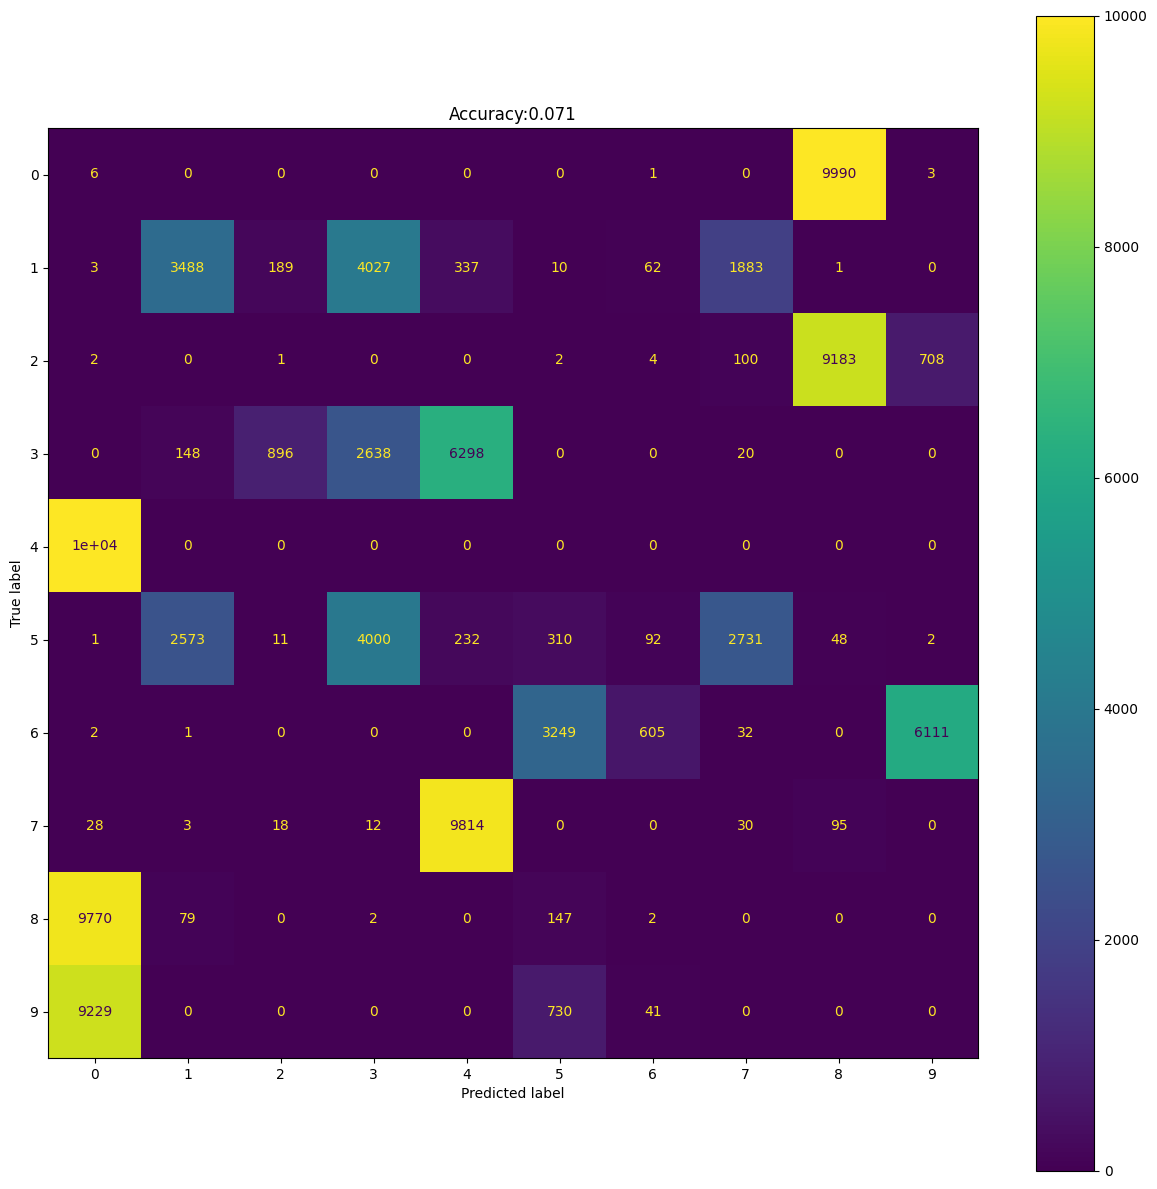

In [8]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [9]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6033 - accuracy: 0.6108
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5172 - accuracy: 0.8576
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3936 - accuracy: 0.9193
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3342 - accuracy: 0.9287
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2965 - accuracy: 0.9348
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2704 - accuracy: 0.9392
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2514 - accuracy: 0.9427
Epoch 8/30
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2368 - accuracy: 0.9452
Epoch 9/30
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2253 - accuracy: 0.9471
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

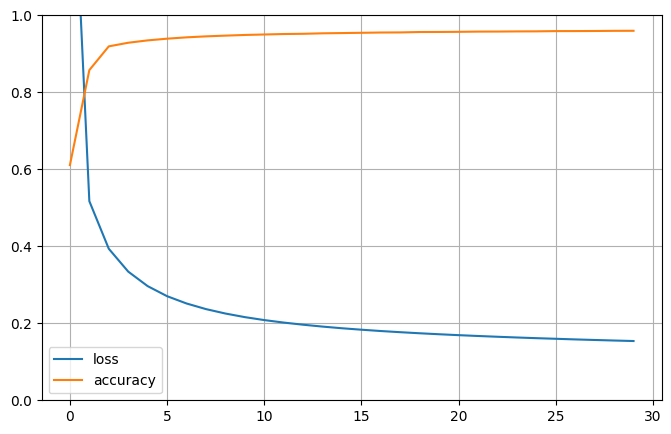

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.1531 - accuracy: 0.9601
test loss, test acc: [0.15314826369285583, 0.9601100087165833]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[9991    0    0    0    5    0    2    0    0    2]
 [   0 8821    4  150    0  926    0   97    0    2]
 [   1    0 9972    1    1   12   11    1    0    1]
 [   0  154    0 9562    0   23    0  261    0    0]
 [   0    0    0    0 9977    0    0    0    8   15]
 [   0  744   29   18    1 9130    5   73    0    0]
 [   0    1   10    0    2   14 9960    0    0   13]
 [   1   39   17  275   14   43    0 9597    1   13]
 [   0    2    0    0   43    2    0    0 9477  476]
 [   0    0    0    0   23    0   25    0  428 9524]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.90      0.88      0.89     10000
           2       0.99      1.00      1.00     10000
           3       0.96      0.96      0.96     10000
           4       0.99      1.00      0.99     10000
           5       0.90      0.91      0.91     10000
           6       1.00      1.0

Test Accuracy:0.96011


Text(0.5, 1.0, 'Accuracy:0.960')

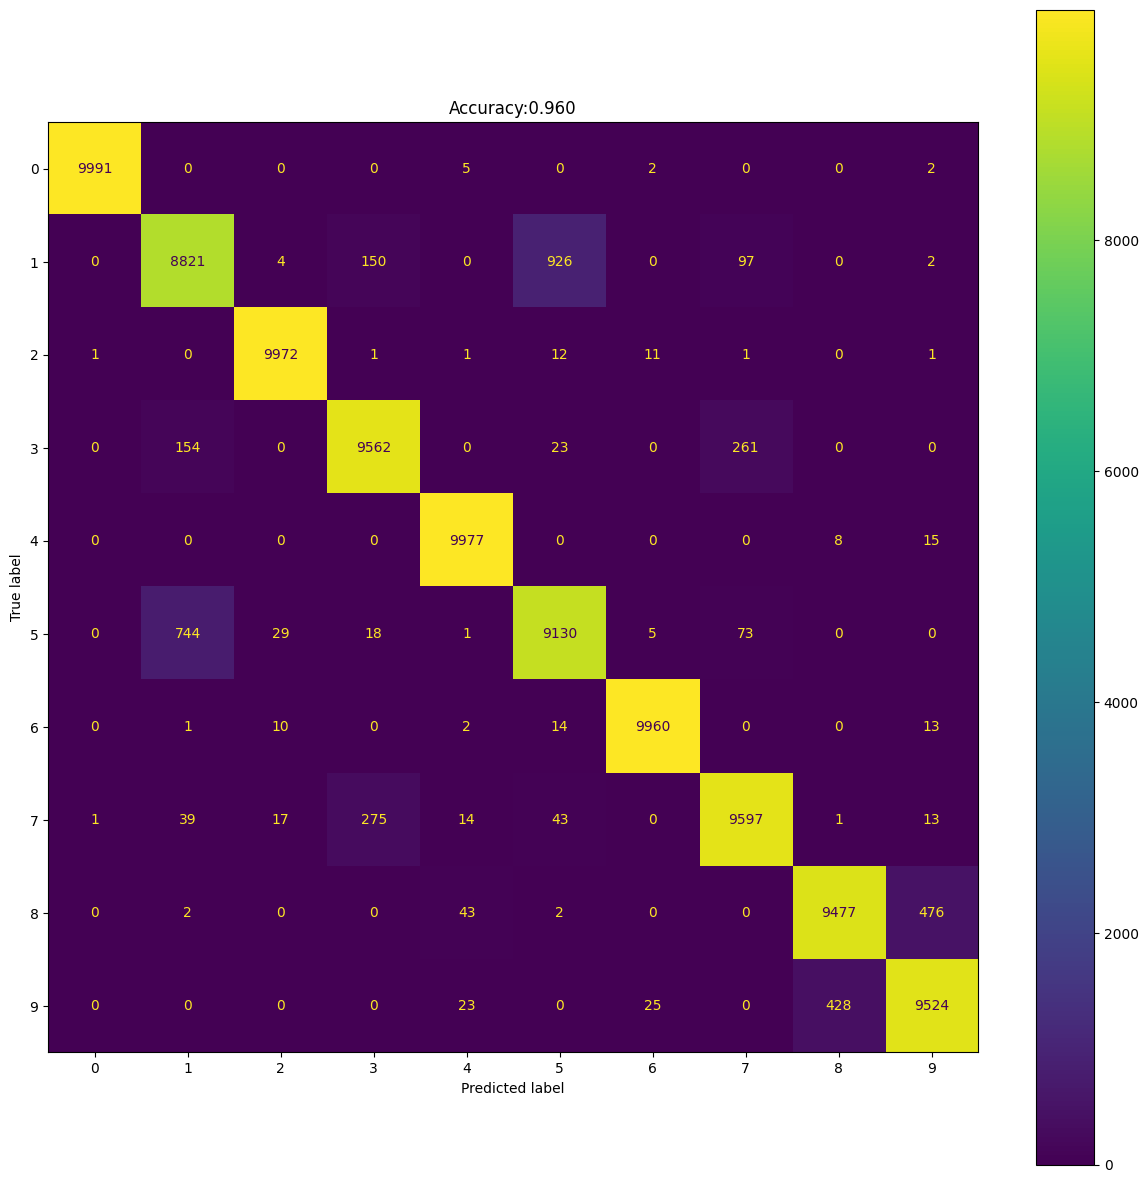

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 9.8280 - accuracy: 0.1375
test loss, test acc: [9.827987670898438, 0.13745999336242676]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   6    0    3    0    0    1    3 9959    0   28]
 [   1 1650 7461    0   40    1  823   15    7    2]
 [   1    1 8739    3    0    1   49    0    0 1206]
 [   0   31 1260    0    7    0 1109 7592    0    1]
 [9991    0    0    0    0    9    0    0    0    0]
 [   1 1457 8125    1    0    0  355    0    4   57]
 [  64    7  995 8929    0    1    0    0    0    4]
 [  27    0 2342    0    0    1 4420 3206    0    4]
 [8772  483    1  446   84   69    0    0  145    0]
 [5602    0    0 3720    0  585    0    0   93    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.45      0.17      0.24     10000
           2       0.30      0.87      0.45     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.13746


Text(0.5, 1.0, 'Accuracy:0.137')

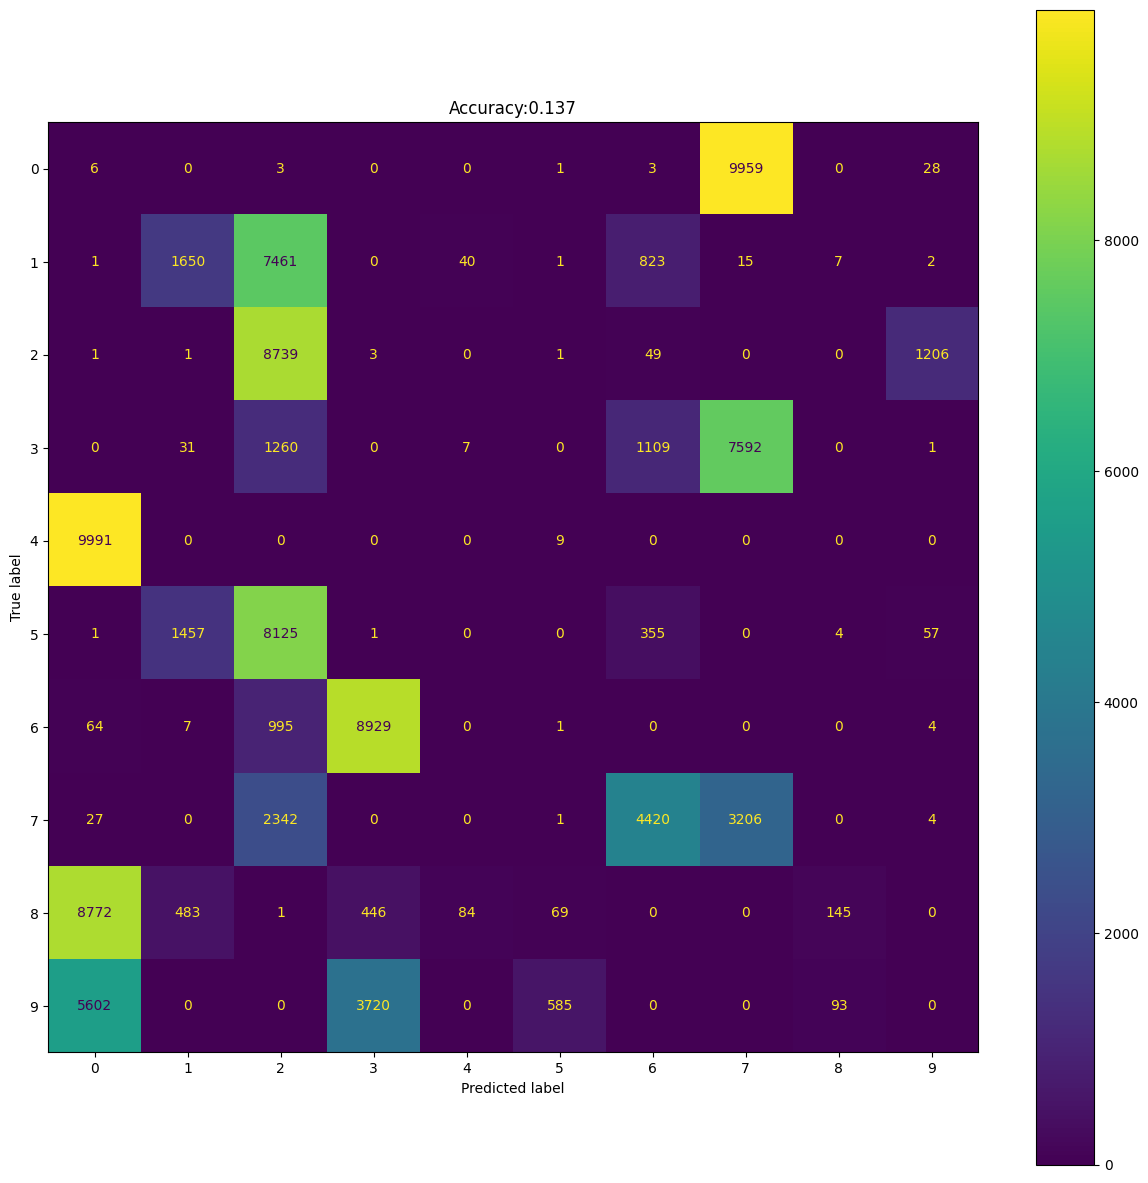

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5866 - accuracy: 0.5531
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6295 - accuracy: 0.7424
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4866 - accuracy: 0.8755
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4114 - accuracy: 0.8979
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3646 - accuracy: 0.9105
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3330 - accuracy: 0.9185
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3100 - accuracy: 0.9246
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2927 - accuracy: 0.9282
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2792 - accuracy: 0.9311
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

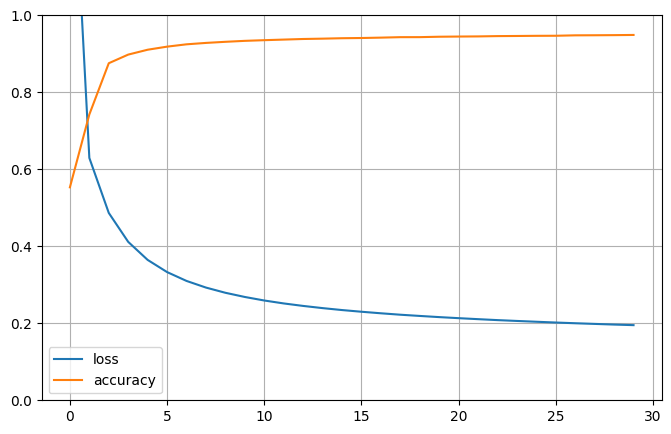

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.1944 - accuracy: 0.9488
test loss, test acc: [0.1943761706352234, 0.9487900137901306]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9994    0    0    0    5    0    0    0    0    1]
 [   0 8939    8  185    0  766    0   98    4    0]
 [   0    1 9889    1    1   82    9   16    0    1]
 [   1  248    0 9135    0    3    0  613    0    0]
 [   0    0    0    0 9972    0    0    0   10   18]
 [   0  957  161   14    1 8787    4   73    3    0]
 [   0    1    4    0    1   12 9968    0    0   14]
 [  10   81    4  452   26    3    0 9423    1    0]
 [   0    4    0    0   12    6    9    0 9426  543]
 [   0    0    0    0   55    0   15    0  584 9346]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.87      0.89      0.88     10000
           2       0.98      0.99      0.99     10000
           3       0.93      0.91      0.92     10000
           4       0.99      1.00      0.99     10000
           5       0.91      0.88      0.89     10000
           6       1.00      1.0

Test Accuracy:0.94879


Text(0.5, 1.0, 'Accuracy:0.949')

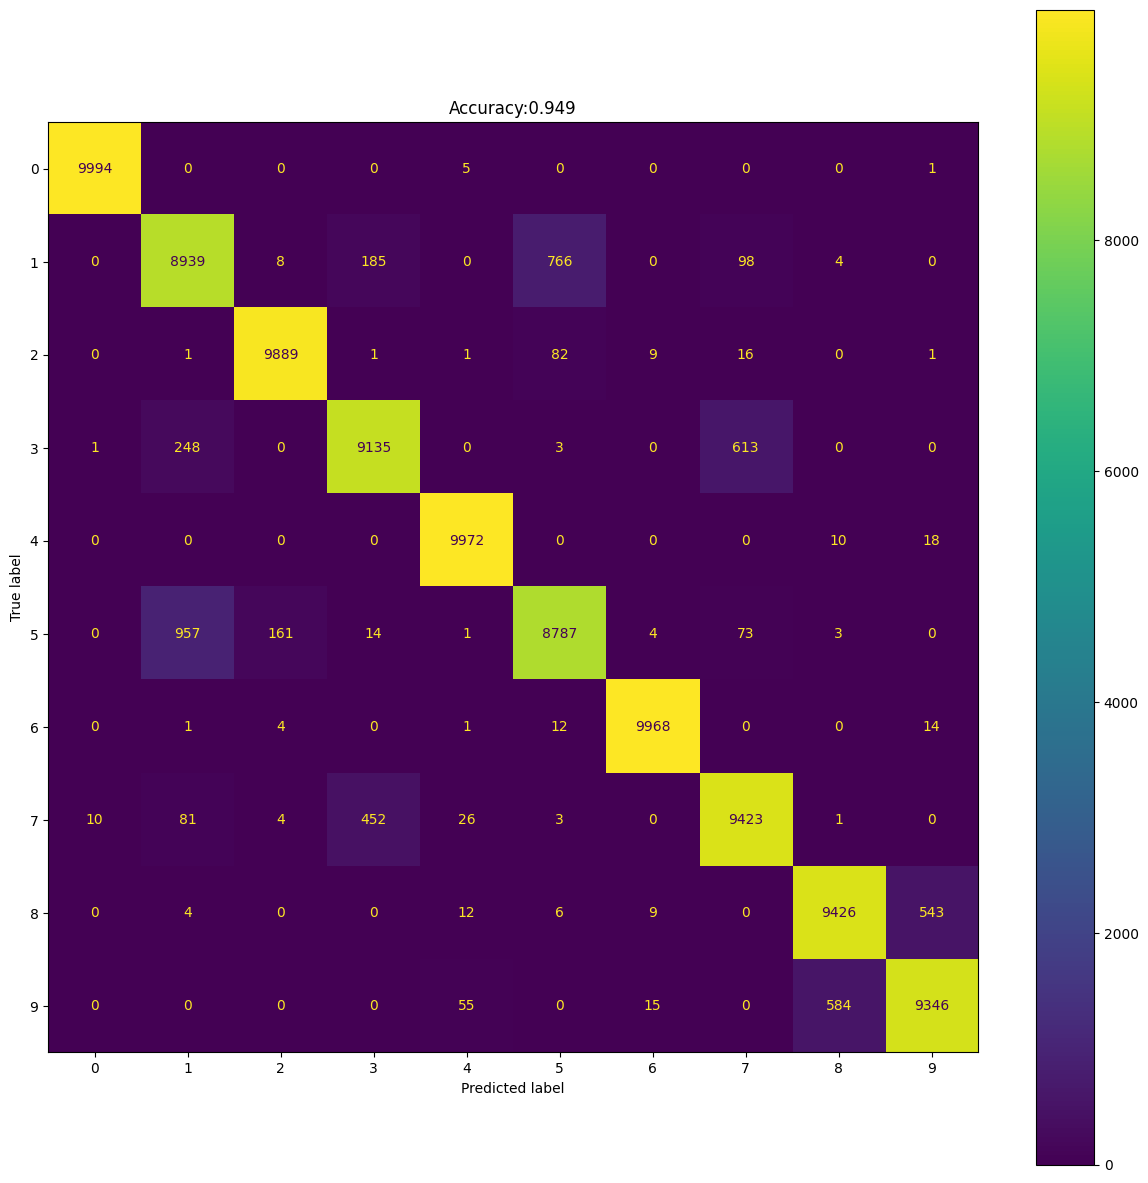

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 17.7147 - accuracy: 0.0997
test loss, test acc: [17.714736938476562, 0.09967000037431717]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[   1    1 9955    0    1    0   32    4    2    4]
 [   0    0    0    0    0    1    3    0 9996    0]
 [   0    0    0    0    0    1    4    1 9992    2]
 [   0    1    0    0    0    0    7    0 9991    1]
 [   1    0    5    2    1  209  952 6597 2233    0]
 [   0    0    0    0    0    0   12    0 9988    0]
 [   1    0    1    0    1    0    8    0 9989    0]
 [   5    0    0    0   16    0    1    1 9977    0]
 [   0    1    1    1    1    2   14   22 9956    2]
 [   0    1    0    0    0    1   15    0 9983    0]]
              precision    recall  f1-score   support

           0       0.12      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.05      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.01      0.0

Test Accuracy:0.09967


Text(0.5, 1.0, 'Accuracy:0.100')

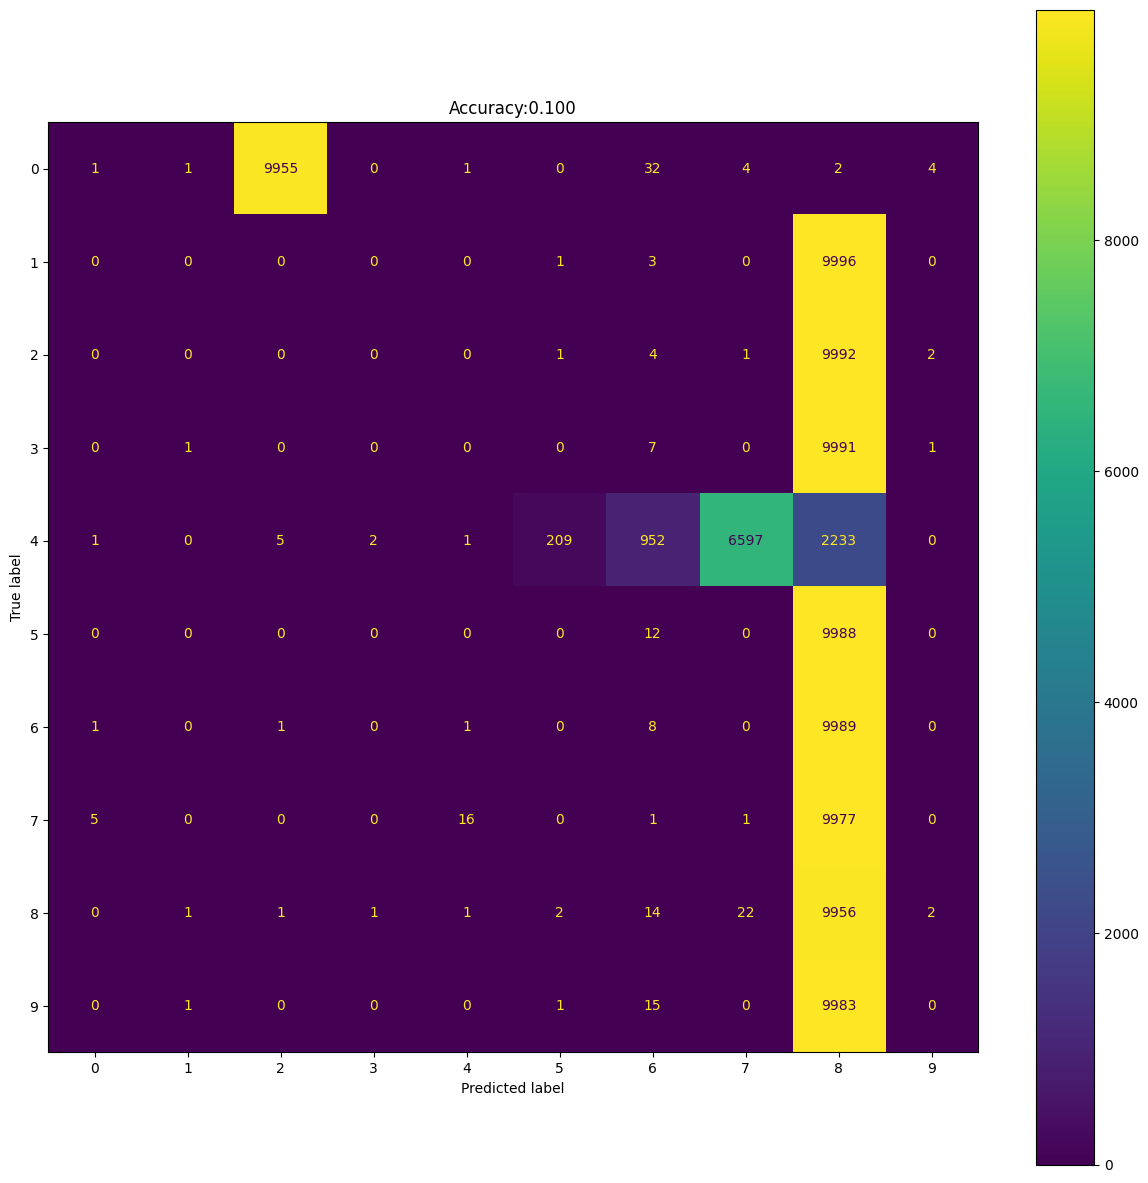

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4799 - accuracy: 0.8863
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4754 - accuracy: 0.8875
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4708 - accuracy: 0.8871
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4666 - accuracy: 0.8880
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4623 - accuracy: 0.8883
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4585 - accuracy: 0.8895
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4547 - accuracy: 0.8908
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4510 - accuracy: 0.8914
Epoch 9/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4474 - accuracy: 0.8913
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

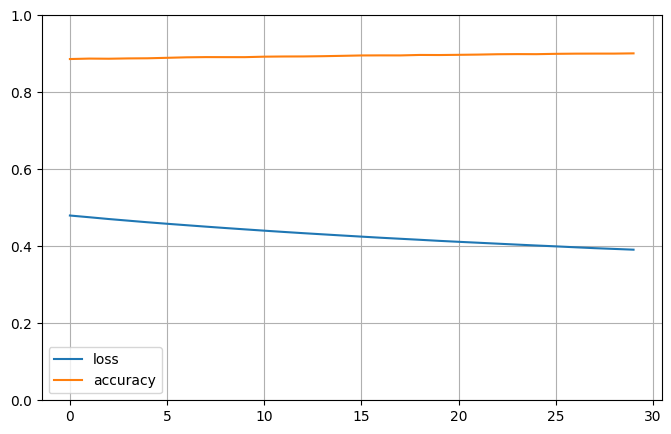

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3889 - accuracy: 0.9024
test loss, test acc: [0.3888789117336273, 0.9023900032043457]


In [34]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9995    0    0    0    5    0    0    0    0    0]
 [   0 8105   80  123    2  628  190  856   15    1]
 [   0   34 8184    4    1  834  362  571    7    3]
 [   0   25    1 9386    2  342    0  237    7    0]
 [   2    0    0    0 9980    0    0    0   14    4]
 [   0  481  593  387    1 7470   72  983   11    2]
 [   0   33  262    2    1   98 9587    1   14    2]
 [  21  547  483  156    5  886   23 7860   18    1]
 [   3   47    0    0   10    0    3    0 9821  116]
 [   1    3    0    0    3    0   27    0  115 9851]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.87      0.81      0.84     10000
           2       0.85      0.82      0.83     10000
           3       0.93      0.94      0.94     10000
           4       1.00      1.00      1.00     10000
           5       0.73      0.75      0.74     10000
           6       0.93      0.9

Test Accuracy:0.90239


Text(0.5, 1.0, 'Accuracy:0.902')

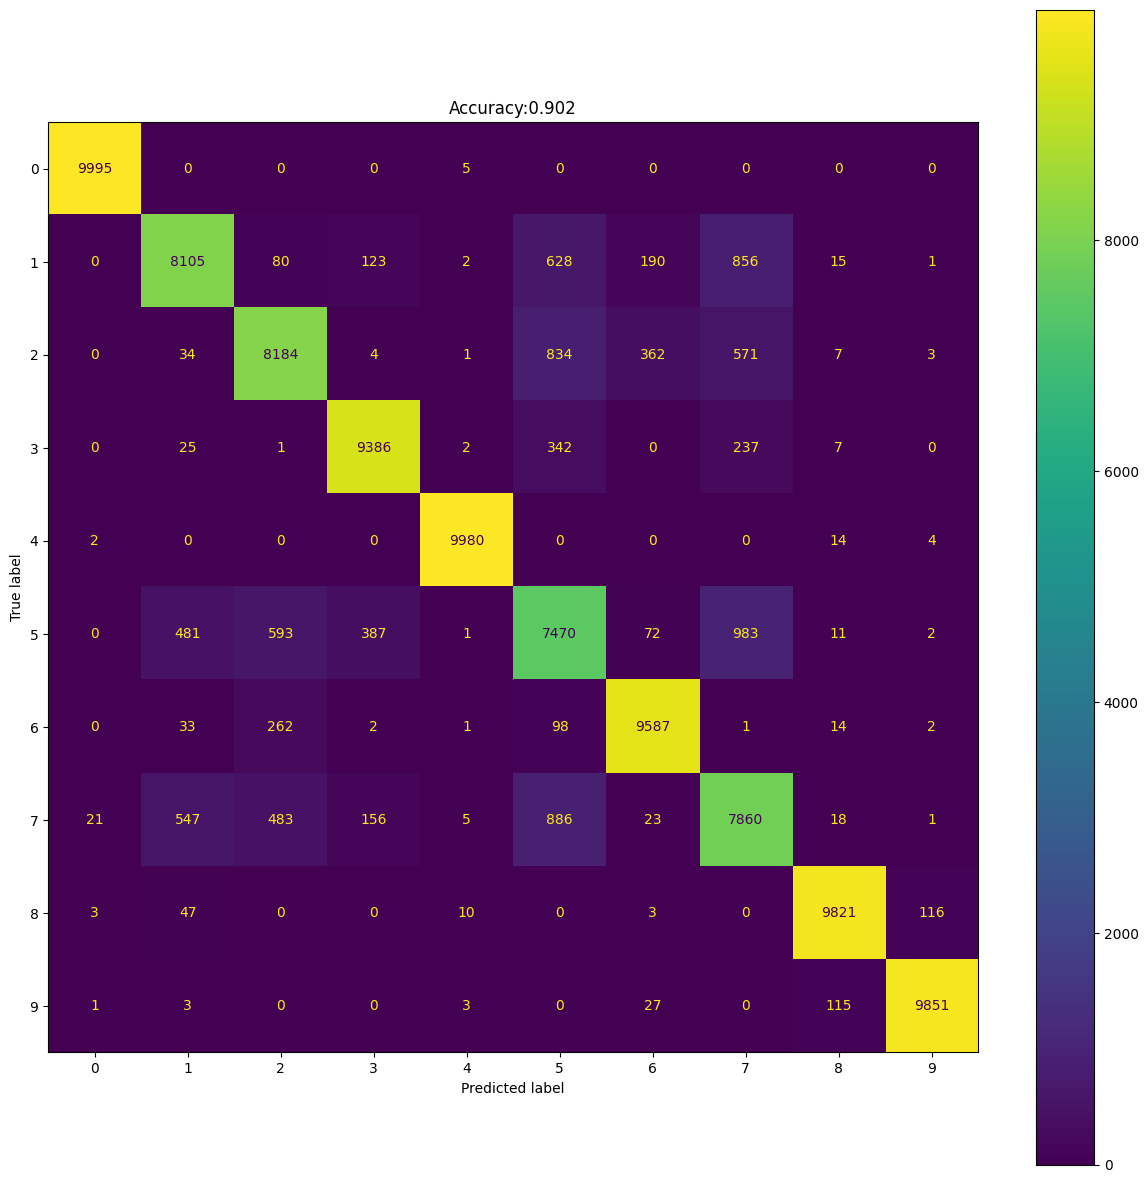

In [35]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')